In [56]:

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

In [57]:
Prudential_train = pd.read_csv("https://raw.githubusercontent.com/crisajose/CIND-820-Big-Data-Analytics-Project/main/train.csv")

In [58]:
Prudential_train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [59]:
CATEGORICAL_COLUMNS = ["Product_Info_1", "Product_Info_2", "Product_Info_3", "Product_Info_5", "Product_Info_6",\
                       "Product_Info_7", "Employment_Info_2", "Employment_Info_3", "Employment_Info_5", "InsuredInfo_1",\
                       "InsuredInfo_2", "InsuredInfo_3", "InsuredInfo_4", "InsuredInfo_5", "InsuredInfo_6", "InsuredInfo_7",\
                       "Insurance_History_1", "Insurance_History_2", "Insurance_History_3", "Insurance_History_4", "Insurance_History_7",\
                       "Insurance_History_8", "Insurance_History_9", "Family_Hist_1", "Medical_History_2", "Medical_History_3",\
                       "Medical_History_4", "Medical_History_5", "Medical_History_6", "Medical_History_7", "Medical_History_8",\
                       "Medical_History_9", "Medical_History_11", "Medical_History_12", "Medical_History_13", "Medical_History_14",\
                       "Medical_History_16", "Medical_History_17", "Medical_History_18", "Medical_History_19", "Medical_History_20",\
                       "Medical_History_21", "Medical_History_22", "Medical_History_23", "Medical_History_25", "Medical_History_26",\
                       "Medical_History_27", "Medical_History_28", "Medical_History_29", "Medical_History_30", "Medical_History_31",\
                       "Medical_History_33", "Medical_History_34", "Medical_History_35", "Medical_History_36", "Medical_History_37",\
                       "Medical_History_38", "Medical_History_39", "Medical_History_40", "Medical_History_41"]
CONTINUOUS_COLUMNS = ["Product_Info_4", "Ins_Age", "Ht", "Wt", "BMI",
                      "Employment_Info_1", "Employment_Info_4", "Employment_Info_6",
                      "Insurance_History_5", "Family_Hist_2", "Family_Hist_3", "Family_Hist_4", "Family_Hist_5"]
DISCRETE_COLUMNS = ["Medical_History_1", "Medical_History_10", "Medical_History_15", "Medical_History_24", "Medical_History_32"]
DUMMY_COLUMNS = ["Medical_Keyword_{}".format(i) for i in range(1, 48)]

In [60]:
categorical_data = Prudential_train[CATEGORICAL_COLUMNS]

In [61]:
continuous_data = Prudential_train[CONTINUOUS_COLUMNS]

In [62]:
discrete_data = Prudential_train[DISCRETE_COLUMNS]

In [63]:
dummy_data = Prudential_train[DUMMY_COLUMNS]

# Variable Types


In [64]:
Prudential_train.dtypes


Id                      int64
Product_Info_1          int64
Product_Info_2         object
Product_Info_3          int64
Product_Info_4        float64
                       ...   
Medical_Keyword_45      int64
Medical_Keyword_46      int64
Medical_Keyword_47      int64
Medical_Keyword_48      int64
Response                int64
Length: 128, dtype: object

# NULL values



In [65]:
Prudential_NULL = Prudential_train.isnull().any()
Prudential_NULL =[col for col in Prudential_train.columns if Prudential_train[col].isnull().any()]
Prudential_NULL

['Employment_Info_1',
 'Employment_Info_4',
 'Employment_Info_6',
 'Insurance_History_5',
 'Family_Hist_2',
 'Family_Hist_3',
 'Family_Hist_4',
 'Family_Hist_5',
 'Medical_History_1',
 'Medical_History_10',
 'Medical_History_15',
 'Medical_History_24',
 'Medical_History_32']

# Categorical Variable - Plot

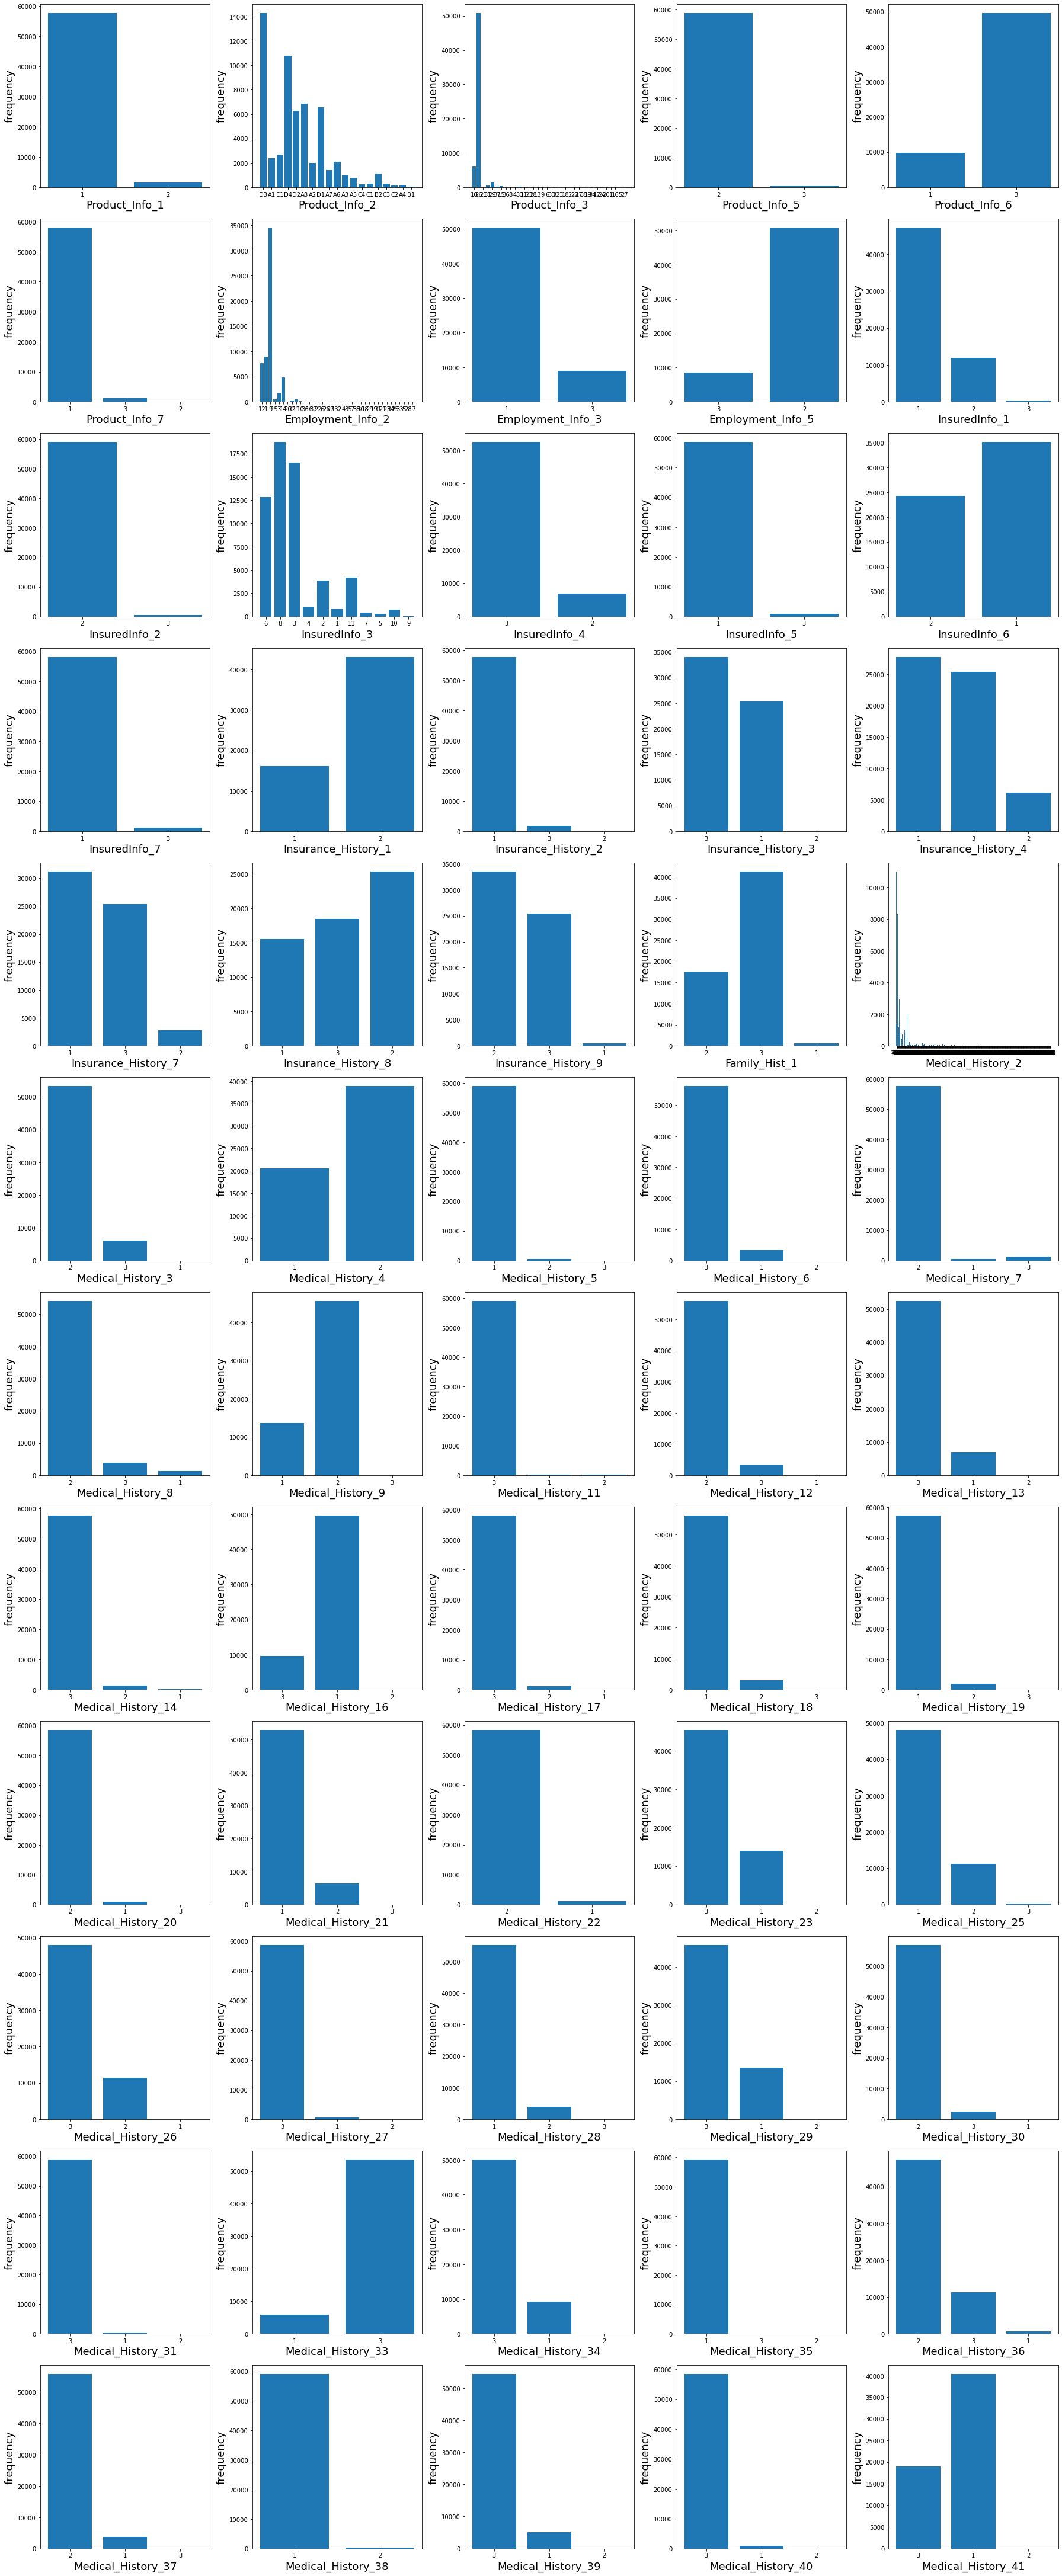

In [66]:
def plot_categoricals(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        cnt = Counter(data[col])
        keys = list(cnt.keys())
        vals = list(cnt.values())
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.bar(range(len(keys)), vals, align="center")
        plt.xticks(range(len(keys)), keys)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_categoricals(categorical_data)

# Continuous Variable - Plot

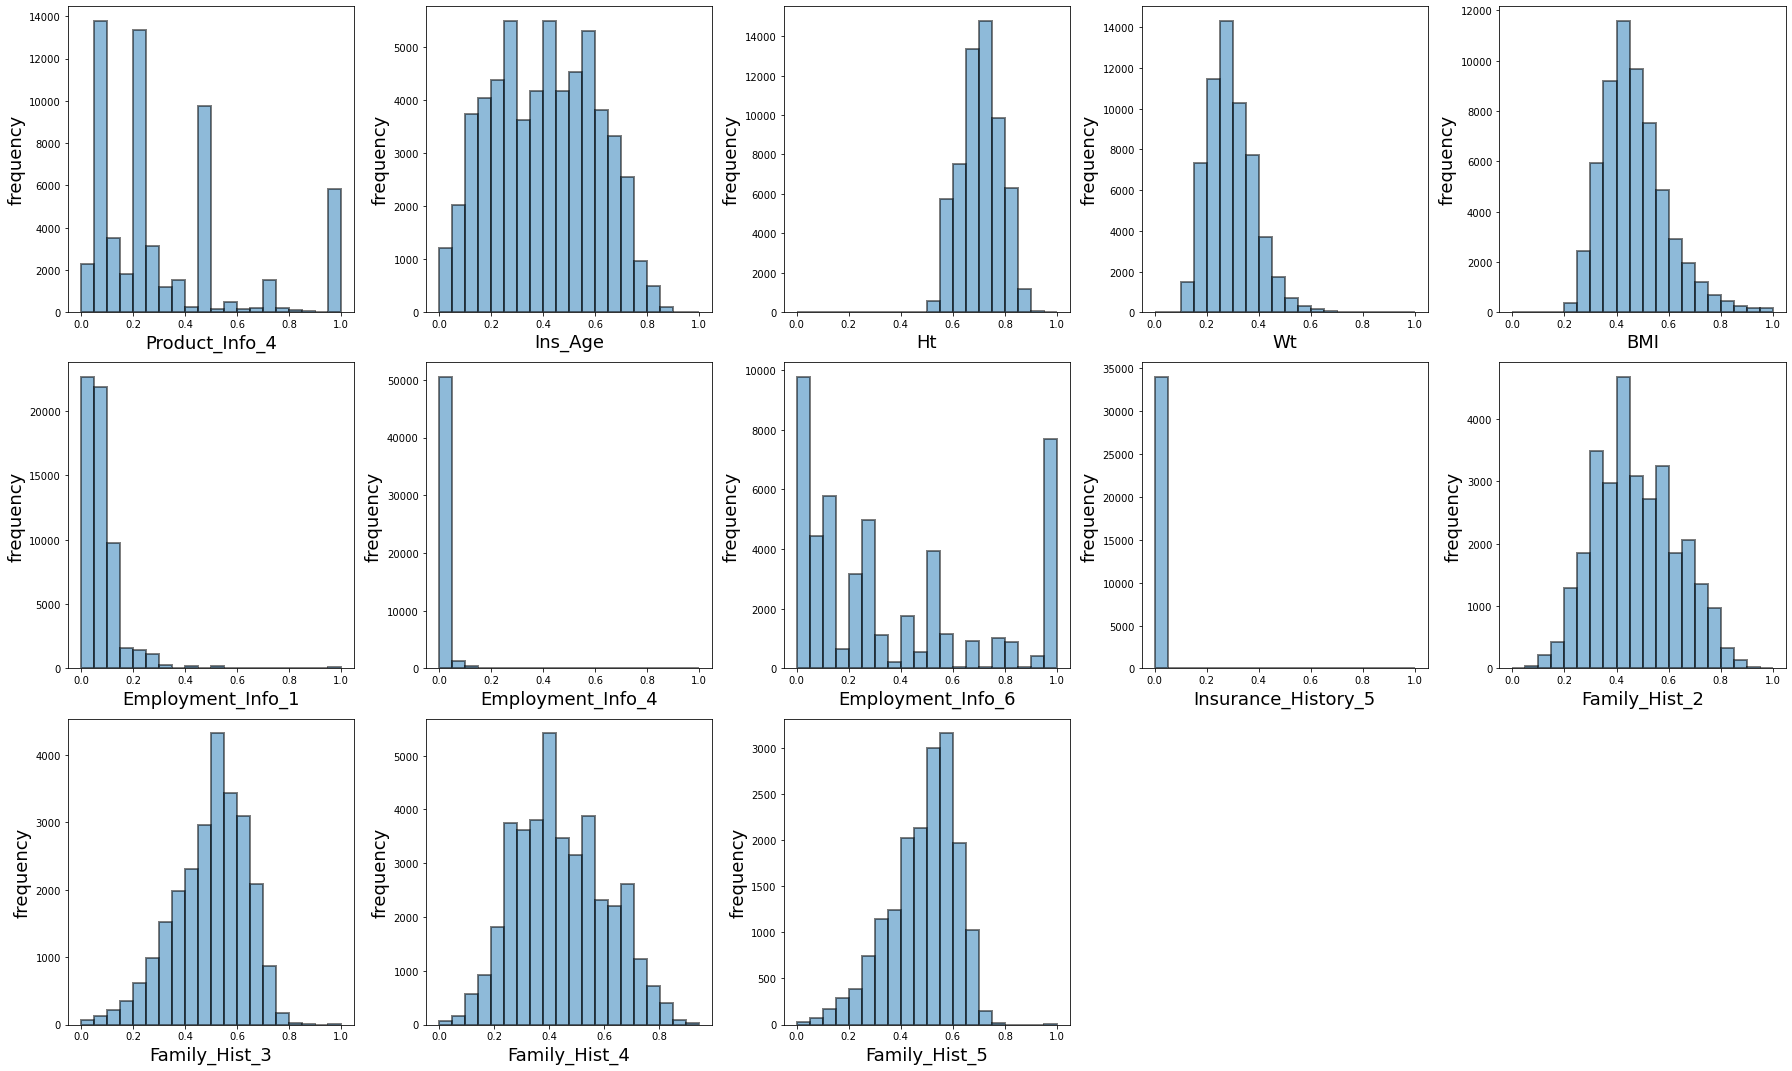

In [67]:
def plot_histgrams(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        X = data[col].dropna()
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.hist(X, bins=20, alpha=0.5, \
                 edgecolor="black", linewidth=2.0)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()
plot_histgrams(continuous_data)

# Discrete Variable - Plot

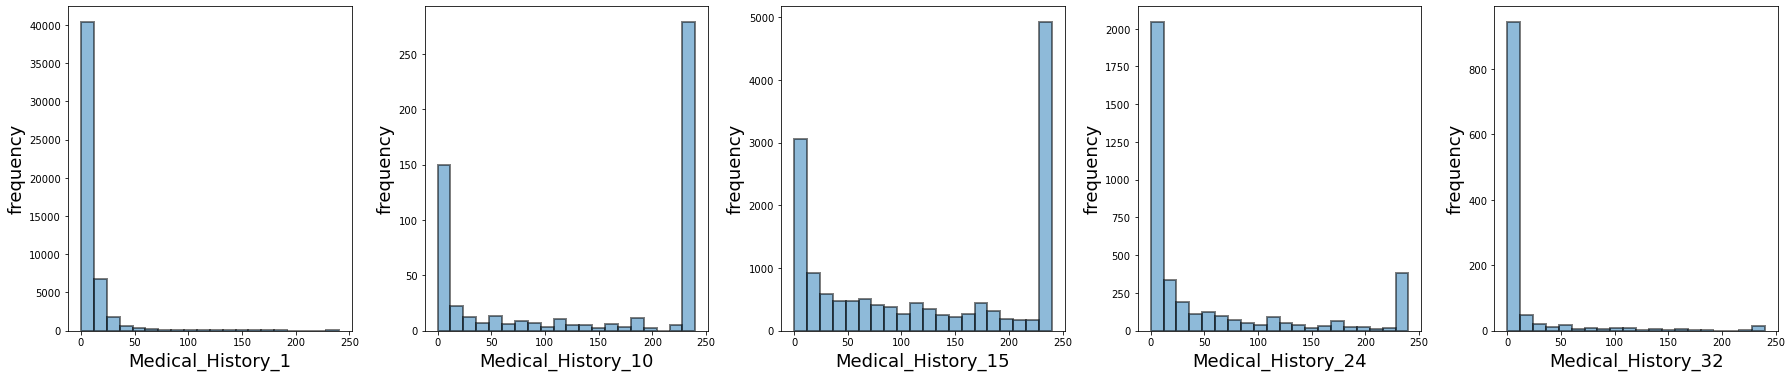

In [68]:
plot_histgrams(discrete_data)

# Dummy Variable - Plot

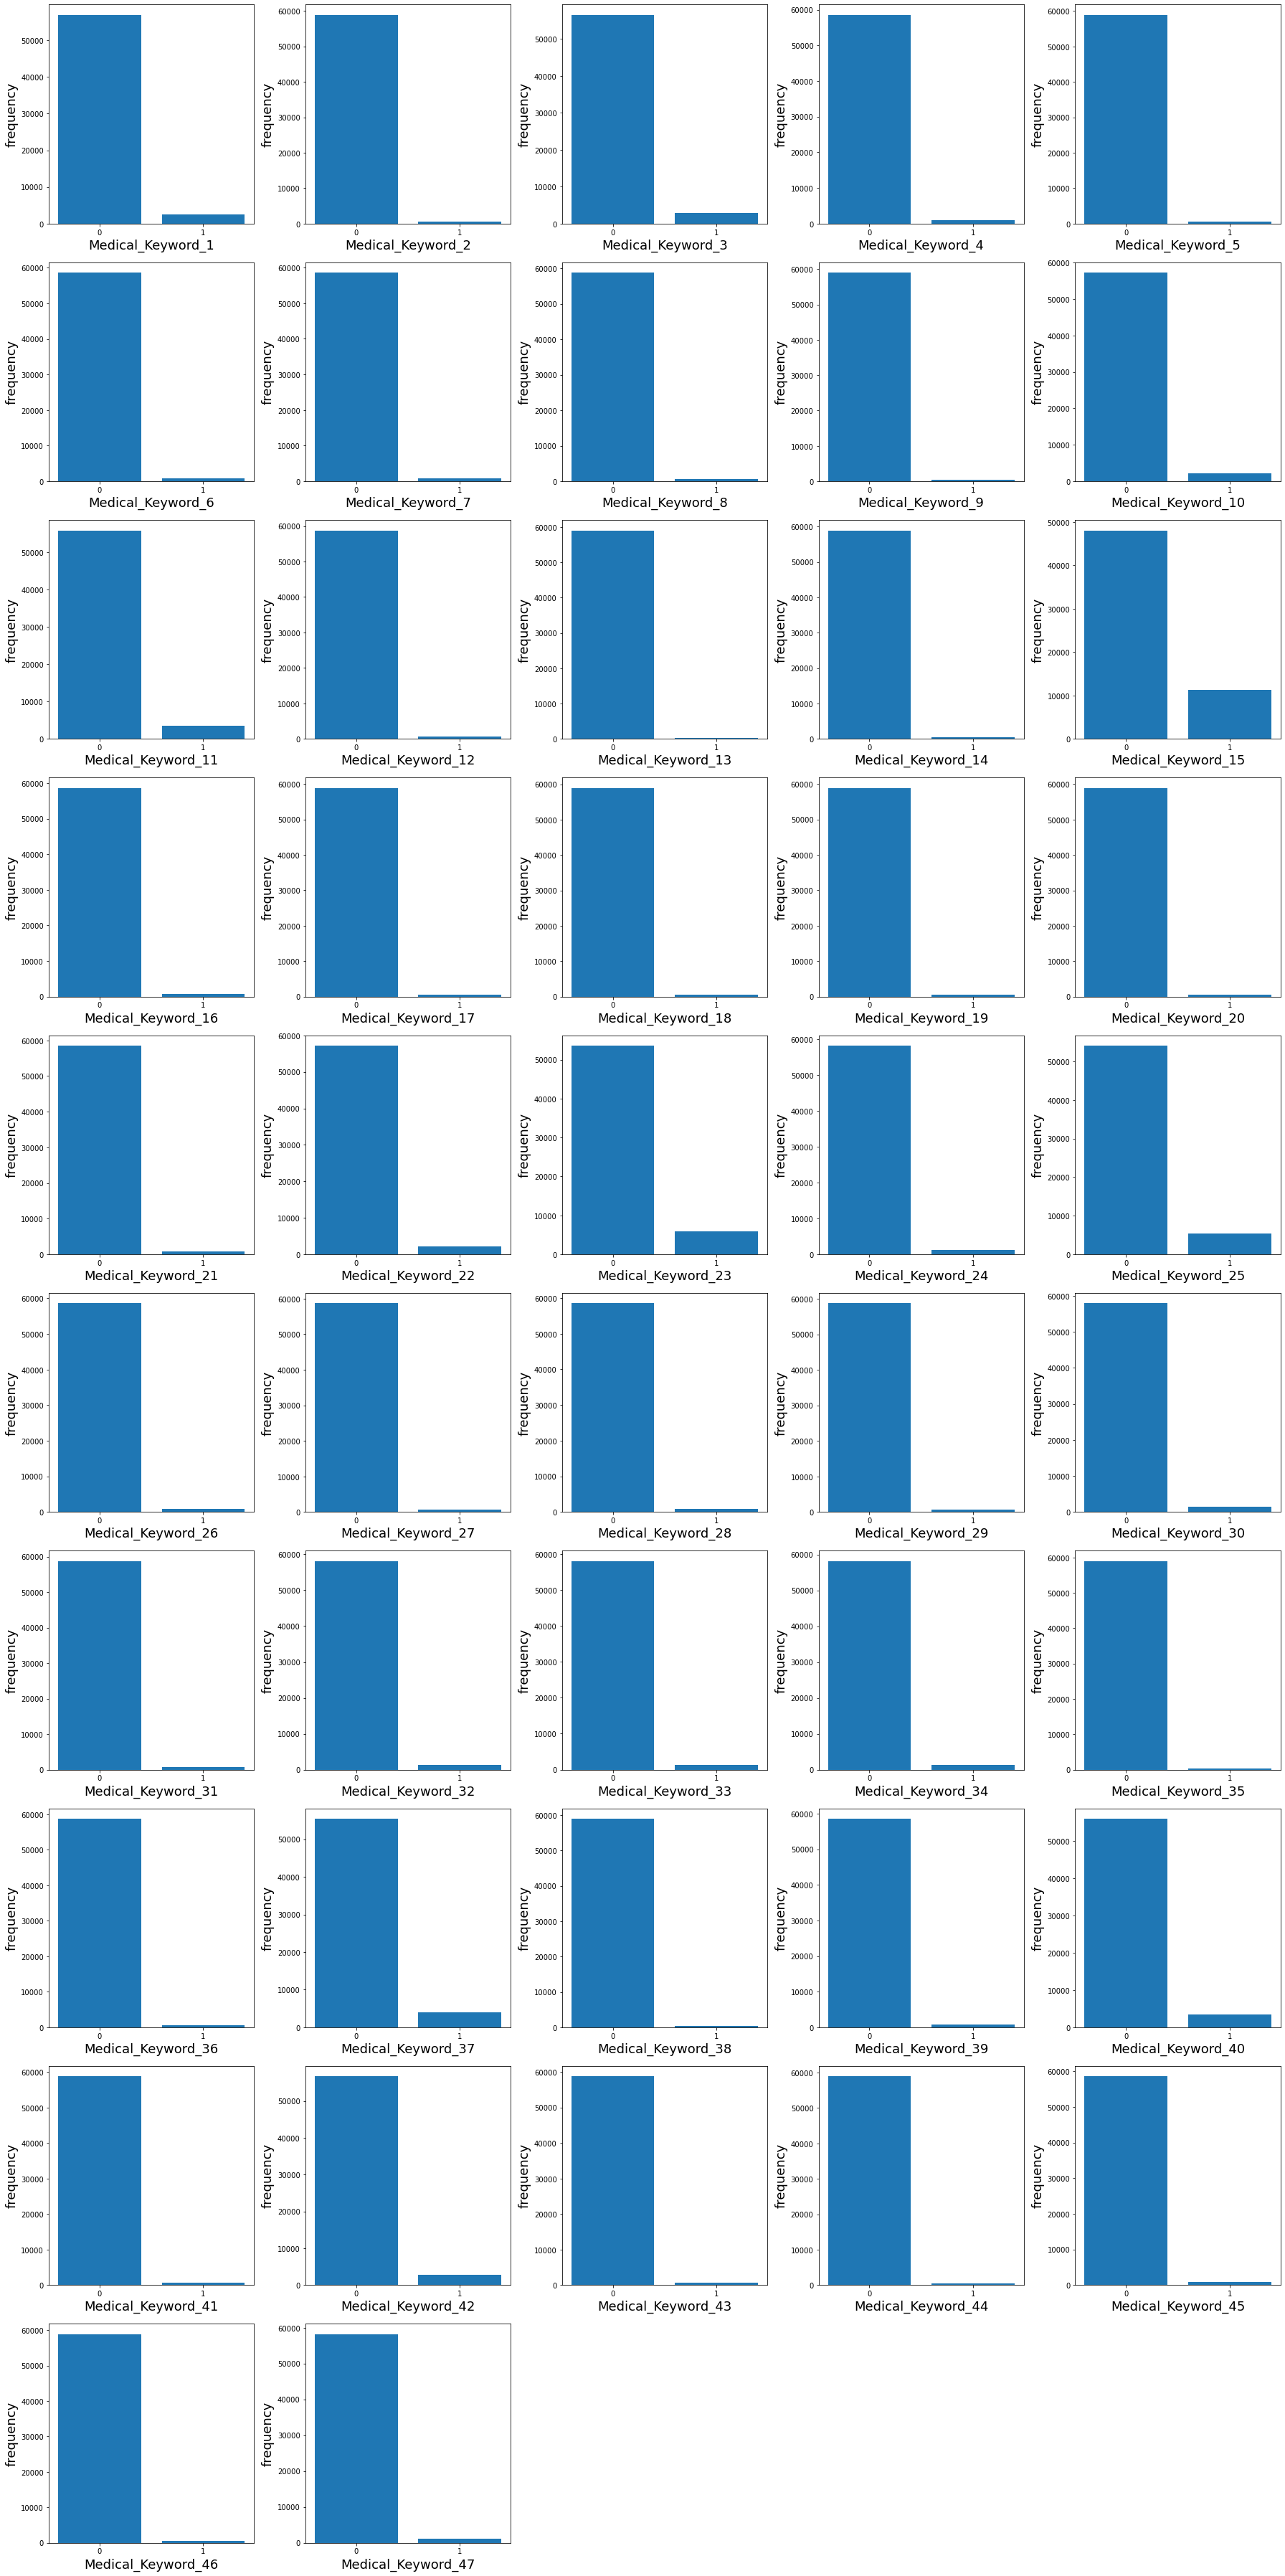

In [69]:
plot_categoricals(dummy_data)

# Response Data Distribution

Text(0.5, 1.0, 'Distribution of rows by response categories')

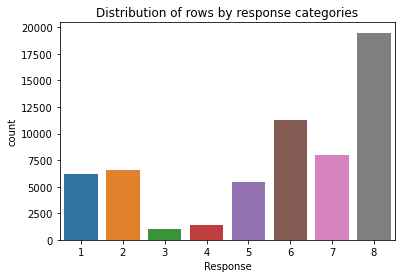

In [70]:
sns.countplot(x=Prudential_train.Response).set_title('Distribution of rows by response categories')

# Outliers Plot

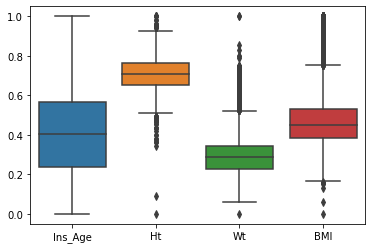

In [71]:
misc_cols=["Ins_Age","Ht","Wt","BMI"]
sns.boxplot(data=Prudential_train[misc_cols])

# Reassign Risk Class

In [72]:
prudential_train=Prudential_train.drop(axis=1,labels=["Product_Info_2"])

In [73]:
prudential_train.dropna(axis=1,inplace=True)

In [74]:
def new_target(row):
    if (row['Response']<=5):
        val=0
    elif (row['Response']==6):
        val=1
    elif (row['Response']==7):
        val=2
    elif (row['Response']==8):
        val=3
    
    else:
        val=-1
    return val
prudential_train['Final_Response']=prudential_train.apply(new_target,axis=1)

Text(0.5, 1.0, 'Distribution of rows by response categories')

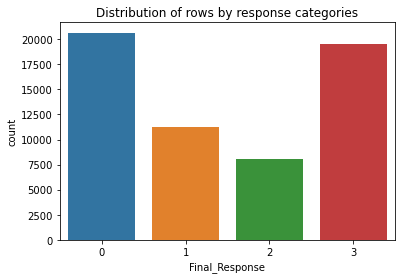

In [75]:
sns.countplot(x=prudential_train.Final_Response).set_title('Distribution of rows by response categories')

# Base Model

In [76]:
y = prudential_train.Final_Response
X = prudential_train.drop(labels=['Response'],axis=1)
X = X.drop(labels=['Final_Response'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=1)


print("Shape of X_train dataset {}".format(X_train.shape))
print("Shape of X_test dataset {}".format(X_test.shape))

print("Shape of y_train dataset {}".format(y_train.shape))
print("Shape of y_valid dataset {}".format(y_test.shape))

Shape of X_train dataset (47504, 113)
Shape of X_test dataset (11877, 113)
Shape of y_train dataset (47504,)
Shape of y_valid dataset (11877,)


# Decision Tree

In [77]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, model_predictions)))
print("="*80)
print(classification_report(y_test, model_predictions))

Accuracy score: 0.5105666414077629
              precision    recall  f1-score   support

           0       0.59      0.58      0.59      4205
           1       0.31      0.33      0.32      2206
           2       0.29      0.31      0.30      1608
           3       0.64      0.62      0.63      3858

    accuracy                           0.51     11877
   macro avg       0.46      0.46      0.46     11877
weighted avg       0.52      0.51      0.51     11877



# Naive Bayes

In [78]:
model = GaussianNB()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, model_predictions)))
print("="*80)
print(classification_report(y_test, model_predictions))

Accuracy score: 0.428222615138503
              precision    recall  f1-score   support

           0       0.71      0.21      0.33      4205
           1       0.26      0.07      0.11      2206
           2       0.29      0.22      0.25      1608
           3       0.42      0.95      0.58      3858

    accuracy                           0.43     11877
   macro avg       0.42      0.36      0.32     11877
weighted avg       0.47      0.43      0.36     11877



# Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, model_predictions)))
print("="*80)
print(classification_report(y_test, model_predictions))

Accuracy score: 0.6259156352614297
              precision    recall  f1-score   support

           0       0.66      0.72      0.69      4205
           1       0.47      0.30      0.36      2206
           2       0.49      0.27      0.35      1608
           3       0.67      0.86      0.75      3858

    accuracy                           0.63     11877
   macro avg       0.57      0.54      0.54     11877
weighted avg       0.60      0.63      0.60     11877



# XGB

In [80]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
model  = XGBClassifier()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, model_predictions)))
print("="*80)
print(classification_report(y_test, model_predictions))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:20:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 0.6312200050517808
              precision    recall  f1-score   support

           0       0.71      0.67      0.69      4205
           1       0.45      0.37      0.41      2206
           2       0.46      0.35      0.40      1608
           3       0.67      0.86      0.75      3858

    accuracy                           0.63     11877
   macro avg       0.58      0.56      0.56     11877
weighted avg       0.62      0.63      0.62     11877



# Treating Outliers

In [81]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


dev=remove_outlier(Prudential_train,'BMI')
dev=remove_outlier(dev,'Wt')
dev=remove_outlier(dev,'Ht')

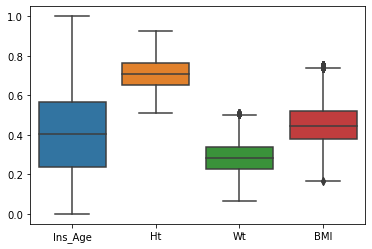

In [82]:
sns.boxplot(data=dev[misc_cols])

In [83]:
prudential_X_train = dev

In [84]:
def new_target(row):
    if (row['Response']<=5):
        val=0
    elif (row['Response']==6):
        val=1
    elif (row['Response']==7):
        val=2
    elif (row['Response']==8):
        val=3
    
    else:
        val=-1
    return val
prudential_X_train['Final_Response']=prudential_X_train.apply(new_target,axis=1)

In [85]:
medical_keyword_cols=[col for col in prudential_X_train.columns if str(col).startswith("Medical_Keyword")]

In [86]:
medical_cols=[col for col in prudential_X_train.columns if str(col).startswith("Medical_History")]

In [87]:
prudential_X_train['Total_MedKwrds']=prudential_X_train[medical_keyword_cols].sum(axis=1)
prudential_X_train['Total_MedHist']=prudential_X_train[medical_cols].sum(axis=1)

In [88]:
prudential_X_train['Total_MedKwrds']

0        0
1        0
2        0
3        1
4        0
        ..
59376    0
59377    0
59378    1
59379    2
59380    0
Name: Total_MedKwrds, Length: 57348, dtype: int64

In [89]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
prudential_X_train['Product_Info_2_en'] = le.fit_transform(prudential_X_train['Product_Info_2'])

In [90]:
prudential_X_train['Product_Info_2_en']

0        16
1         0
2        18
3        17
4        15
         ..
59376    14
59377    16
59378    18
59379    15
59380     7
Name: Product_Info_2_en, Length: 57348, dtype: int64

In [91]:
prudential_X_train = prudential_X_train.drop(axis=1,labels=['Product_Info_2'])

In [92]:
prudential_X_train.Final_Response.unique()

array([3, 0, 1, 2])

# Feature Selection

In [93]:
prudential_X_train = prudential_X_train.drop(labels = ['Response'],axis=1)
prudential_X_train = prudential_X_train.drop(labels = ['Medical_History_10'],axis=1)
prudential_X_train = prudential_X_train.drop(labels = ['Medical_History_15'],axis=1)
prudential_X_train = prudential_X_train.drop(labels = ['Medical_History_24'],axis=1)
prudential_X_train = prudential_X_train.drop(labels = ['Medical_History_32'],axis=1)
prudential_X_train = prudential_X_train.drop(labels = ['Id'],axis=1)

# Fill Null Values

In [94]:
prudential_X_train = prudential_X_train.fillna(prudential_X_train.mean())

# Build Model

In [95]:
y = prudential_X_train.Final_Response
X = prudential_X_train.drop(labels=['Final_Response'],axis=1)
X = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=1)
print("Shape of X_train dataset {}".format(X_train.shape))
print("Shape of X_test dataset {}".format(X_test.shape))

print("Shape of y_train dataset {}".format(y_train.shape))
print("Shape of y_valid dataset {}".format(y_test.shape))

Shape of X_train dataset (45878, 124)
Shape of X_test dataset (11470, 124)
Shape of y_train dataset (45878,)
Shape of y_valid dataset (11470,)


# Decision Tree - with feature selection

In [96]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, model_predictions)))
print("="*80)
print(classification_report(y_test, model_predictions))

Accuracy score: 0.5188317349607672
              precision    recall  f1-score   support

           0       0.56      0.55      0.56      3731
           1       0.34      0.36      0.35      2202
           2       0.33      0.33      0.33      1642
           3       0.67      0.65      0.66      3895

    accuracy                           0.52     11470
   macro avg       0.48      0.47      0.47     11470
weighted avg       0.52      0.52      0.52     11470



# Naive Bayes - with feature selection

In [97]:
model = GaussianNB()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, model_predictions)))
print("="*80)
print(classification_report(y_test, model_predictions))

Accuracy score: 0.44272013949433303
              precision    recall  f1-score   support

           0       0.58      0.32      0.41      3731
           1       0.27      0.09      0.13      2202
           2       0.24      0.36      0.29      1642
           3       0.50      0.80      0.61      3895

    accuracy                           0.44     11470
   macro avg       0.40      0.39      0.36     11470
weighted avg       0.44      0.44      0.41     11470



# Random Forest - with feature selection

In [98]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.6207497820401047
              precision    recall  f1-score   support

           0       0.62      0.71      0.66      3731
           1       0.48      0.29      0.36      2202
           2       0.54      0.27      0.36      1642
           3       0.67      0.87      0.76      3895

    accuracy                           0.62     11470
   macro avg       0.58      0.54      0.54     11470
weighted avg       0.60      0.62      0.59     11470



# XGB - with feature selection

In [99]:
!pip install xgboost

In [100]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
model  = XGBClassifier()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:21:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  0.6415867480383609
              precision    recall  f1-score   support

           0       0.68      0.66      0.67      3731
           1       0.50      0.39      0.44      2202
           2       0.50      0.39      0.44      1642
           3       0.70      0.88      0.78      3895

    accuracy                           0.64     11470
   macro avg       0.60      0.58      0.58     11470
weighted avg       0.63      0.64      0.63     11470

